## 1 Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment. 

This exercise will show you how the methods you have learned can be used for this classification task.

## 2 Visualize data

### 2.1 Dataset

You will start by loading the dataset for this task. 

- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)<br/>
Note: you can download that and put it in the data/X.npy, it's too large to put it in github :)</sub>

In [31]:
import numpy as np

def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

X, y = load_data()

In [32]:
# print x_train
print(">>>>>>")
print("Type of x_train:",type(X))
print("First five elements of x_train are:\n", X[:5]) 
print("Shape of x_train:", X.shape)

# print y_train
print(">>>>>>")
print("Type of y_train:",type(y))
print("First five elements of y_train are:\n", y[:5])  
print("Shape of y_train:", y.shape)

>>>>>>
Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of x_train: (1000, 400)
>>>>>>
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [[0]
 [0]
 [0]
 [0]
 [0]]
Shape of y_train: (1000, 1)


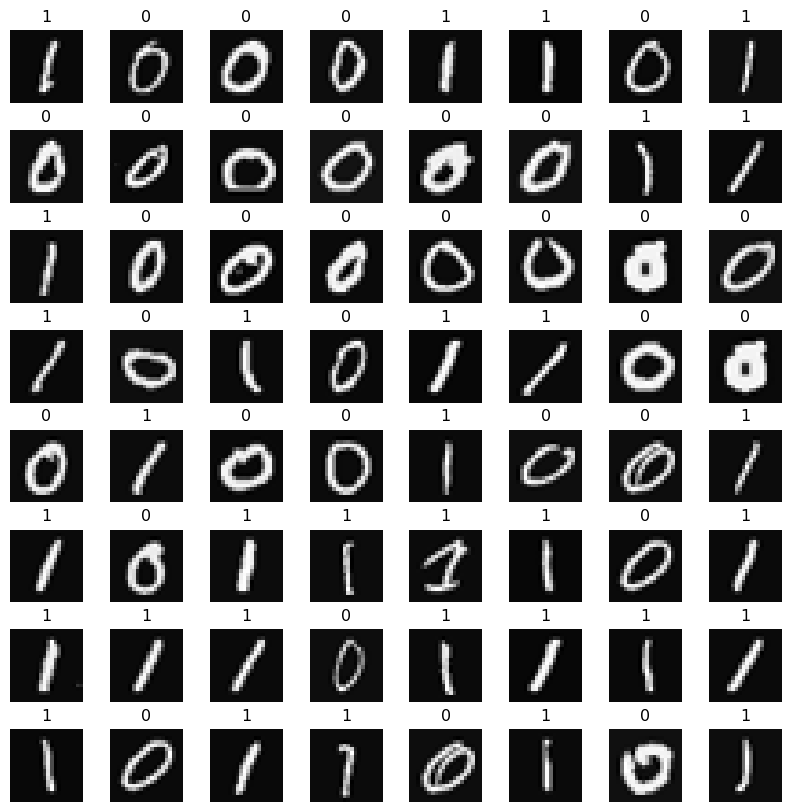

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('../lib/deeplearning.mplstyle')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

## 3 neural network implementation

### 3.1 network architecture

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# GRADED CELL: Sequential model

model = Sequential(
    [
        # X is 1000, 400
        # - 1000: 1000 examples
        # - 400: 20px*20px img
        tf.keras.Input(shape=(400,)),    #specify input size (optional)
        ### START CODE HERE ### 
        Dense(25, activation='sigmoid'), 
        Dense(15, activation='sigmoid'), 
        Dense(1,  activation='sigmoid')  
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            

model.summary()

[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)


Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


### 3.2 train model

In [35]:
model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7673  
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5477
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4081
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2950
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2073
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1574
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1234
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1006
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0874 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0723
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0605
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0544
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0490
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0419
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0377
Epoch 16/20
32/3

### 3.3 prediction

In [36]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
 predicting a zero: [[0.0278956]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
 predicting a one:  [[0.9867566]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

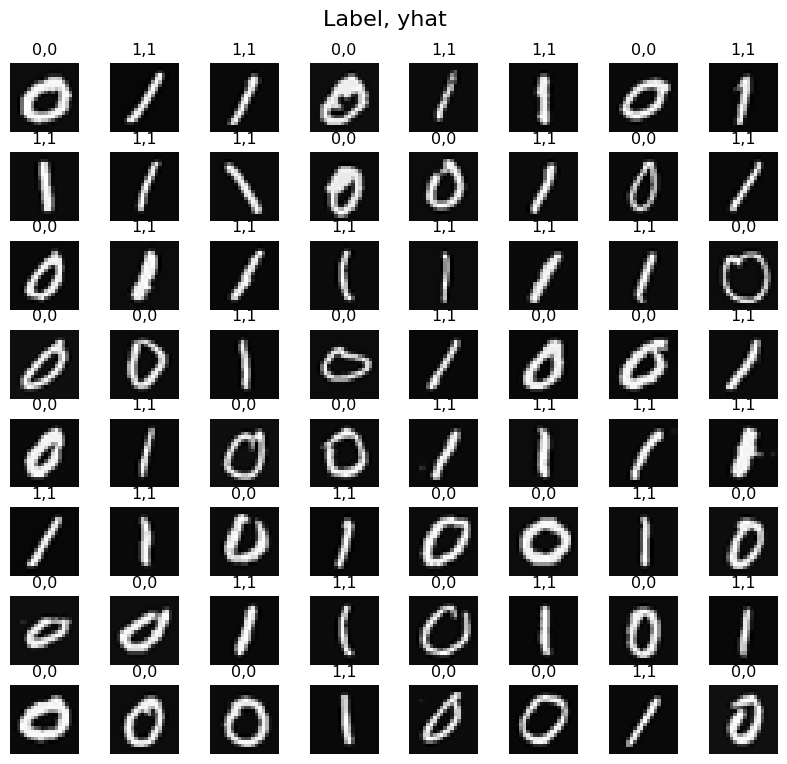

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

## 4 Numpy Model Implementation

### 4.1 implementation intuition with one sample

#### 4.1.1 utils functions

In [38]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    g = 1 / (1 + np.exp(-z))
    ### END SOLUTION ###  
    
    return g

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
### START CODE HERE ### 
    for j in range(units):             
        z =  np.dot(W[:,j], a_in) + b[j]  # dot product of w and a_in + b
        a_out[j] = g(z)                       # apply activation to z
### END CODE HERE ### 
    return(a_out)

def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

def my_predict(x_pre):
    """
    predict the input pic x_pre

    Args:
        x_pre (ndarray): A scalar, numpy array of size: 400.

    Returns:
        prediction (scalar): prediction is 0 or 1
         
    """
    # We can copy trained weights and biases from Tensorflow.
    W1_tmp,b1_tmp = layer1.get_weights()
    W2_tmp,b2_tmp = layer2.get_weights()
    W3_tmp,b3_tmp = layer3.get_weights()
    
    prediction = my_sequential(x_pre, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    return 1 if prediction >= 0.5 else 0


#### 4.1.2 compare prediction between tf and numpy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

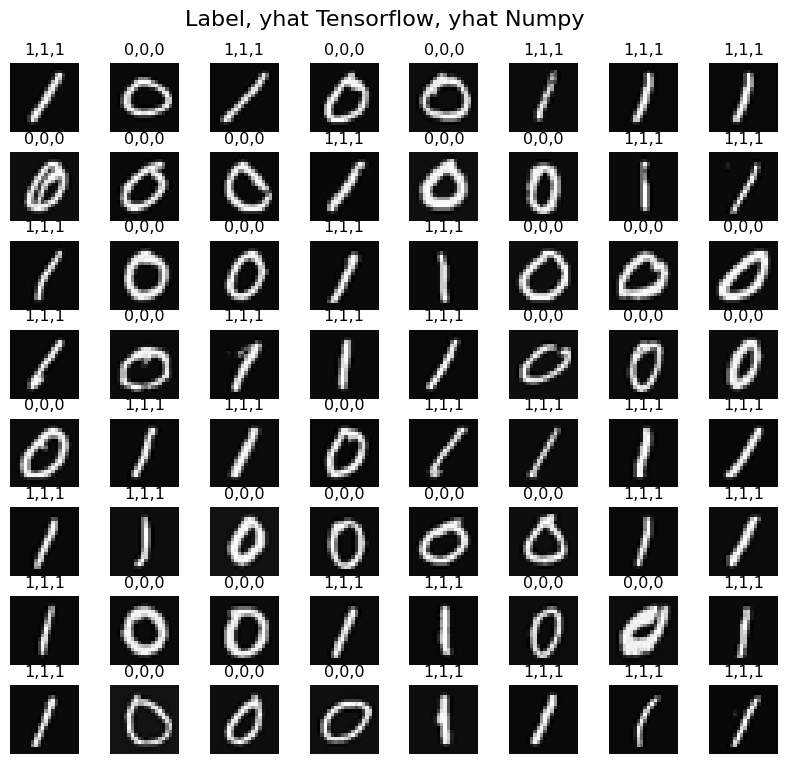

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    # my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    # my_yhat = int(my_prediction >= 0.5)
    my_yhat = my_predict(X[random_index])

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    # tf_yhat = int(tf_prediction >= 0.5)
    tf_yhat = 1 if tf_prediction >= 0.5 else 0 
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

### 4.2 implementation intuition with vector

#### 4.2.1 utils functions

In [40]:
# UNQ_C3
# UNGRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (tf.Tensor or ndarray (m,j)) : m examples, j units
    """
### START CODE HERE ### 
    A_out = g(np.matmul(A_in, W) + b)
    
### END CODE HERE ### 
    return(A_out)

def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

def my_predict_v(X_pre):
    """
    predict the input pic X_pre

    Args:
        X_pre (ndarray (m,n)): Data, m examples, n features each

    Returns:
        prediction (scalar): prediction is 0 or 1
         
    """
    # We can copy trained weights and biases from Tensorflow.
    W1_tmp,b1_tmp = layer1.get_weights()
    W2_tmp,b2_tmp = layer2.get_weights()
    W3_tmp,b3_tmp = layer3.get_weights()

    Prediction = my_sequential_v(X_pre, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    Yhat = (Prediction >= 0.5).astype(int)
    return Yhat


#### 4.2.2 compare prediction between tf and numpy vector

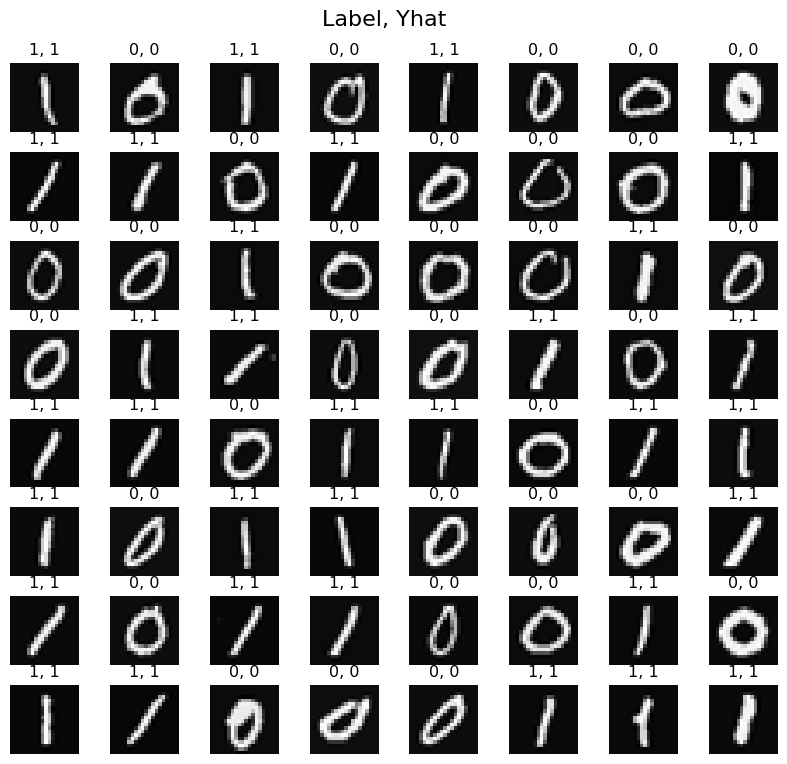

In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

Yhat_v = my_predict_v(X)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat_v[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()